# Block-sequential updating modes

The `minibn` module provides explicit computation of the dynamics of Boolean networks under a range of pre-defined updating modes, and allows defining custom ones.

The updating modes are defined as Python classes which are instantiated with the Boolean network object as input, and parameters of the updating mode, if any.
The dynamics are computed as a directed graph represented by a [`networkx.DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) object. By default, the whole dynamics are computed, but it can be restricted to the transitions reachable from a given initial configuration.

This notebook describes the computation of the synchronous (parallel), sequential, and block sequential updating modes, reproducing Figure 6.2.

Additional features and tips are provided in the notebook [8 - Advanced usage.ipynb](8%20-%20Advanced%20usage.ipynb).

In [1]:
from colomoto.minibn import *

This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

In [2]:
f = BooleanNetwork({
    "x1": "!x3",
    "x2": "x2 & (x1 | x3)",
    "x3": "!x1"
})
f

x1 <- !x3
x2 <- x2&(x1|x3)
x3 <- !x1

## Synchronous (Parallel)

The `dynamics()` method returns the whole dynamics of the Boolean network:

# computing graph layout...


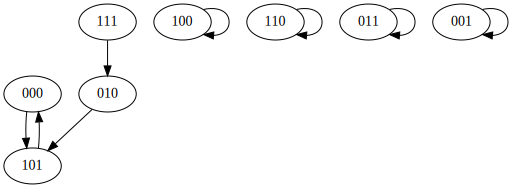

In [3]:
f_par = SynchronousDynamics(f) # or ParallelDynamics(f)
dyn = f_par.dynamics()
dyn

The dynamics reachable from an initial configuration is computed by the `partial_dynamics` method, taking as input a configuration, specifed as a Python dictionnary mapping automata names to their binary state:

# computing graph layout...


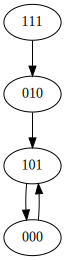

In [4]:
dyn_111 = SynchronousDynamics(f).partial_dynamics({"x1": 1, "x2": 1, "x3": 1})
dyn_111

The objects returned by `dynamics()` and `partial_dynamics` methods are [`networkx.DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) instances. These objects can be displayed whenever they are of small size, as shown above.
In addition, the `networkx` library provides efficient implementation of many graph-related algorithms, see https://networkx.org/documentation/stable/reference/algorithms/index.html.
We briefly demonstrate it with the `attracting_components` function which computes the terminal strongly connected components of the digraph, corresponding to the limit configurations of the Boolean network:

In [5]:
import networkx as nx

In [6]:
list(nx.attracting_components(dyn))

[{'000', '101'}, {'100'}, {'110'}, {'011'}, {'001'}]

In [7]:
list(nx.attracting_components(dyn_111))

[{'000', '101'}]

## Sequential

The `SequentialDynamics` class is instantiated with the sequence of automata to update as a first argument, and the Boolean network as a second argument. The sequence can be specified as a standard Python `list` or `tuple` of automata names.

# computing graph layout...


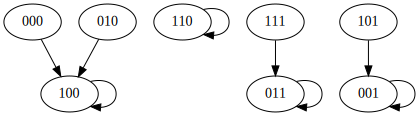

In [8]:
SequentialDynamics(("x2", "x1", "x3"), f).dynamics()

## Block sequential

The `BlockSequentialDynamics` class generalizes the `SequentialDynamics` by allowing *blocks* of automata in the sequence of updates (a block is updated in parallel). A block can be specified as a standard Python `list`, `tuple`, or `set`. 

# computing graph layout...


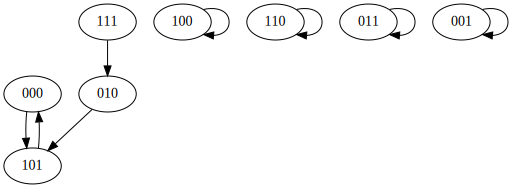

In [9]:
BlockSequentialDynamics(({"x2"},{"x1","x3"}), f).dynamics()

Singleton blocks can be directly specified with the automaton name:

# computing graph layout...


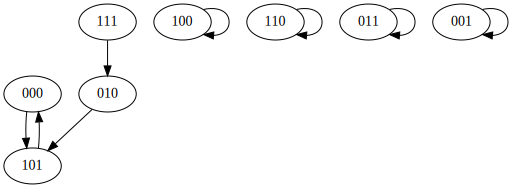

In [10]:
BlockSequentialDynamics(("x2",{"x1","x3"}), f).dynamics()